<h1><center>Inteligencia Artificial</center></h1>


<h2><center>Tarea 5 - Inferencia Bayesiana y EDA (Exploración de Datos)</center></h2>

---

#### El **objetivo** de esta tarea es realizar un análisis exploratorio básico sobre el conjunto de datos proporcionado (pedidos de clientes a lo largo del tiempo). 


* Además, deberán agregar su informacción correspondiente del equipo que hayan formado, así como el link de github correspondiente al cual cargarán la notebook (ejecutada previamente), para visualizar las respuestas.

---
#Aquí sus datos

Juan Francisco Gortarez Ricardez A01021926 https://github.com/Starfleet-Command/A01021926-Sistemas_Inteligentes

Samantha Barco Mejía A01196844 https://github.com/SamBarcoM/Sistemas_Inteligentes\

Brandon Reyes A01335537 https://github.com/Brandonitas/Sistemas_Inteligentes

---

### Objetivo

Predecir qué productos estarán en el próximo pedido de un usuario. El conjunto de datos es anónimo y contiene una muestra de más de 3 millones de pedidos de comestibles de más de 200,000 usuarios de Instacart.

Para cada usuario se entregan 4 y 100 de sus pedidos, con la secuencia de productos comprados en cada pedido

<img src="https://shukka.com/img/xeda.PNG.pagespeed.ic.MVCnc5-70D.png" />

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_data



In [ ]:
order_products_train_df = pd.read_csv("./order_products__train.csv")
order_products_prior_df = pd.read_csv("./order_products__prior.csv")
orders_df = pd.read_csv("./orders.csv")
products_df = pd.read_csv("./products.csv")
aisles_df = pd.read_csv("./aisles.csv")
departments_df = pd.read_csv("./departments.csv")

In [ ]:
#Así se despliega información del cabezal del dataframe
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
#Mostrar header de prior y train
order_products_train_df.head()
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
#Aqui su código
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## ¿Qué contiene cada archivo?


# Aquí su respuesta
aisles.csv describe los productos que se pueden encontrar en el pasillo indicado por aisle_id 

departments.csv describe las áreas/departamentos que se encuentran en el supermercado

order_products__prior.csv contiene la relación de productos con las ordenes de compras, indica si fueron reorganizados o no.

order_products__train.csv relaciona los productos con el departamento (departments.csv) y pasillo al que pertenecen (aisles.csv)

orders.csv tiene toda la información sobre el pedido, como la data del usuario que ha comprado el pedido, cuándo se compró, días desde el pedido anterior, etc.

products.csv 

-----

Como se mencionó anteriormente, en este conjunto de datos, se dan de 4 a 100 pedidos de un cliente (lo veremos más adelante) y necesitamos predecir los productos que se volverán a ordenar. Así que el último pedido del usuario se ha extraído y dividido en conjuntos de prueba y de entrenamiento. 

Todas las informaciones de pedidos anteriores del cliente están presentes en el archivo order_products_prior. También podemos notar que hay una columna en el archivo orders.csv llamada eval_set que nos dice a cuál de los tres conjuntos de datos (previo, entrenamiento o prueba) va la fila dada.

-----

Primero obtengamos el recuento de filas en cada uno de los tres conjuntos.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


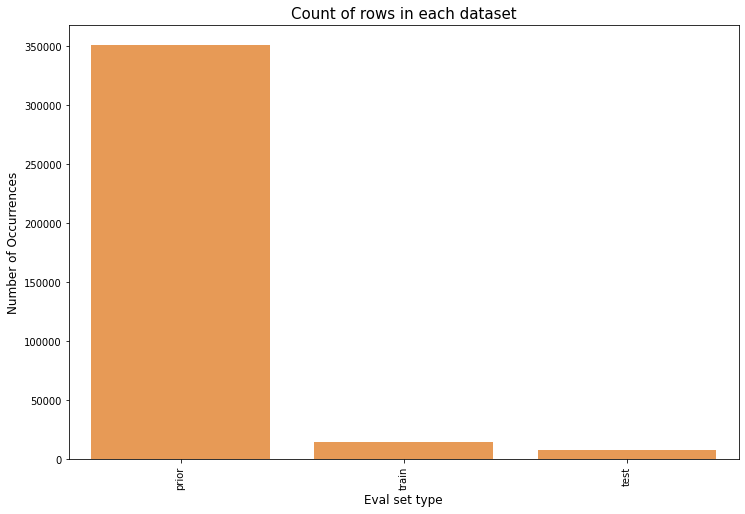

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    22489
test      8094
train    14394
Name: user_id, dtype: int64

# ¿Qué significan los valores anterior? Suponiendo que teníamos un total de clientes...

### Aquí su respuesta

Hay 22,489 clientes en total. De los cuales, los últimos 14,389 fueron dados como el set de entrenamiento para que podamos predecir con los otros 8,094

Ahora validemos la afirmación de que se dan de 4 a 100 pedidos de un cliente.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



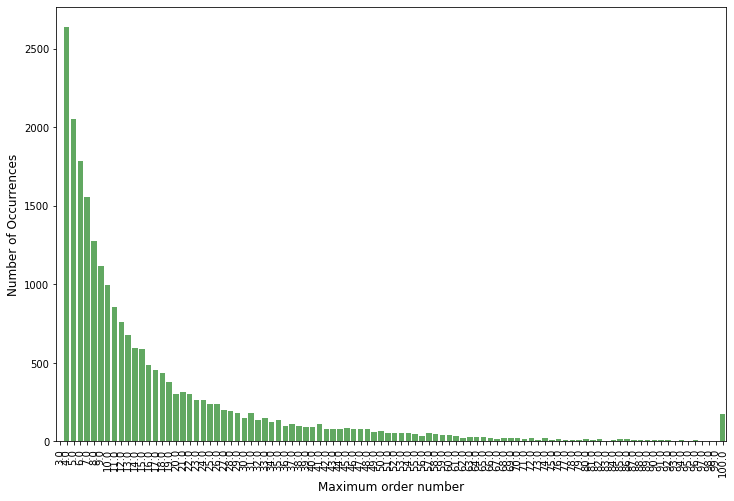

In [ ]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
#Aquí su código para mostrar gráfico
plt.show()

Por lo tanto, no hay pedidos de menos de 4 y tiene un límite máximo de 100 como se indica en la página de datos.

Ahora veamos cómo cambia el hábito de hacer pedidos con el día de la semana.

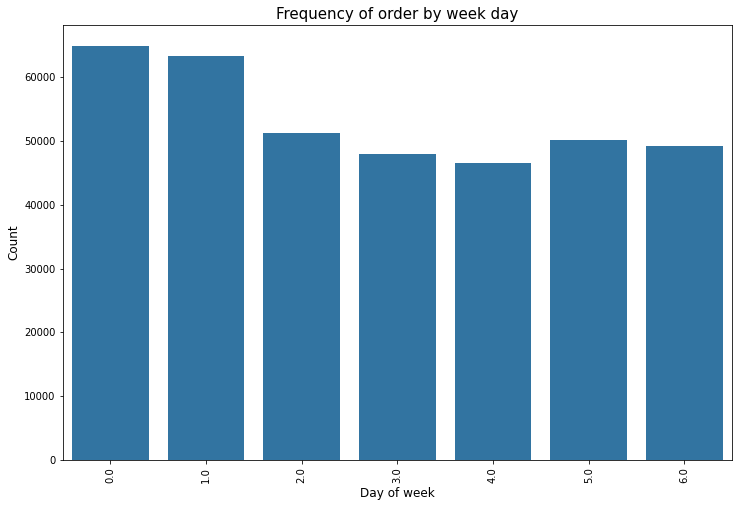

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
#Aquí su código para mostrar gráfico
plt.show()

## ¿Cuáles són los días con mayor y menor cantidad de pedidos?

## Aquí su respuesta

El 0 y 1 (sábado y domingo) son los días con más pedidos y el 3 (miércoles) es el día con pedidos más bajos

Ahora veremos cómo es la distribución con respecto a la hora del día.

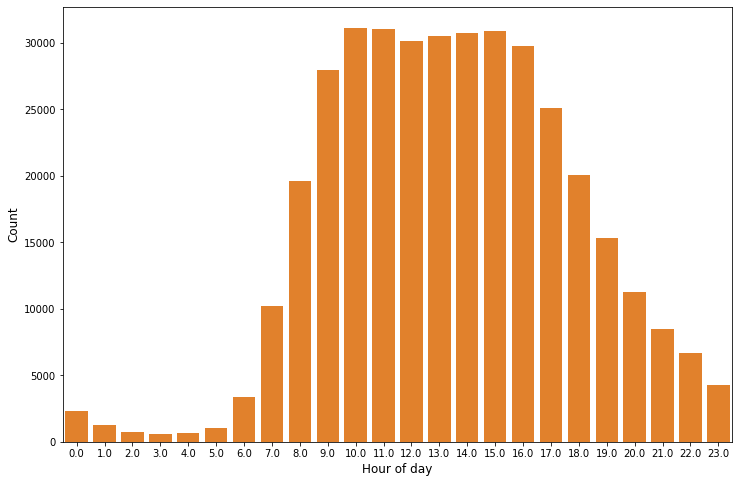

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
#Aquí su código para mostrar gráfico
plt.show()

# ¿En qué periodo de tiempo se realiza la mayor cantidad de pedidos? 

Durante el día

Ahora combinemos el día de la semana y la hora del día para ver la distribución.

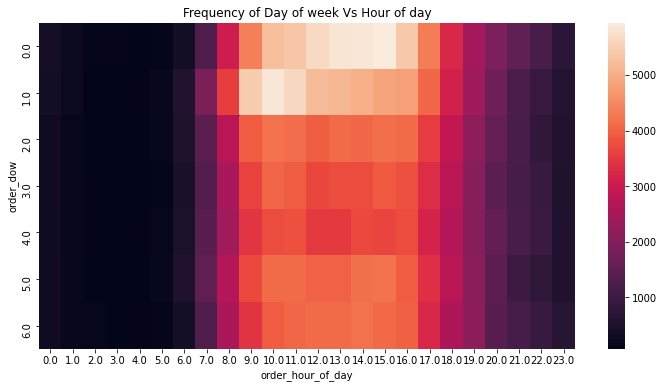

In [ ]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

# ¿Cuándo es el mejor momento para realizar pedidos acorde a lo anterior?

---

## Aquí su respuesta

Sábados en la noche y domingos en la mañana

Ahora revisemos el intervalo de tiempo entre los pedidos.

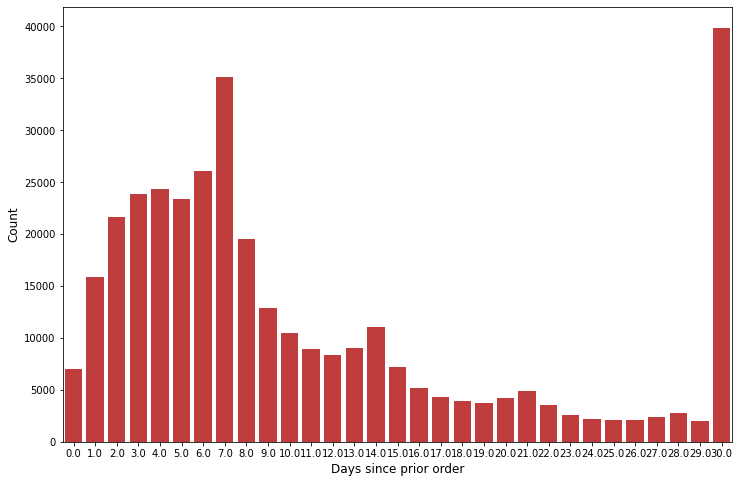

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
#Aquí su código para mostrar gráfico
plt.show()

# Parece que los clientes hacen pedidos... ¿cada cuánto?

### Aquí su respuesta

Una vez a la semana (el pico está en el día 7) o una vez al mes (pico en día 30)

---

# Según la tendencia, ¿hay otros días que muestren picos pequeños?

### Aquí su respuesta

Cada 14 días, 21 y 28 días

---


Dado que nuestro objetivo es averiguar los reordenamientos, veamos el porcentaje de reorden en la serie anterior y la serie de trenes.

In [ ]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.591128110254225

In [ ]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5982212074228402

## ¿Qué significan los valores anteriores?

### Aquí su respuesta

En promedio, 59% de los productos son productos re-ordenados

---

### No hay productos reordenados:

Ahora que hemos visto que el 59% de los productos se vuelven a pedir, también habrá situaciones en las que no se vuelva a pedir ninguno de los productos. Comprobemos eso ahora.

In [ ]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1.0    0.880103
0.0    0.119897
Name: reordered, dtype: float64

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1.0    0.935081
0.0    0.064919
Name: reordered, dtype: float64

# ¿Y en esta sección?

### Aquí su respuesta

El 12% de las ordenes del set "prior" no tiene productos re-ordenados. Mientras que en el set de entrenamiento el valor es del 6%

----

Ahora veamos la cantidad de productos comprados en cada pedido.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of products in the given order')

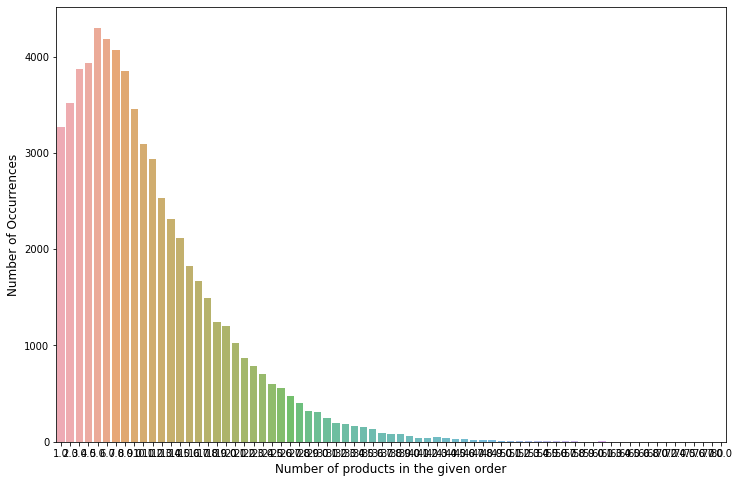

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
#Aquí el código faltante para mostrar gráfico

# ¿Cuál es el valor más alto?

### Aquí su respuesta

Valor más alto es 5

---

Antes de explorar los detalles del producto, veamos también los otros tres archivos.

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Ahora fusionemos estos detalles del producto con los detalles de order_prior.

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry


In [ ]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,10681
1,Bag of Organic Bananas,8573
2,Organic Strawberries,5878
3,Organic Baby Spinach,5403
4,Organic Hass Avocado,4769
5,Organic Avocado,3914
6,Large Lemon,3394
7,Strawberries,3145
8,Limes,3120
9,Organic Raspberries,3067


# ¿Qué podemos inferir de los resultados anteriores?


### Aquí su respuesta

La gran mayoría son frutas y productos orgánicos

---

Ahora echemos un vistazo a los pasillos importantes.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


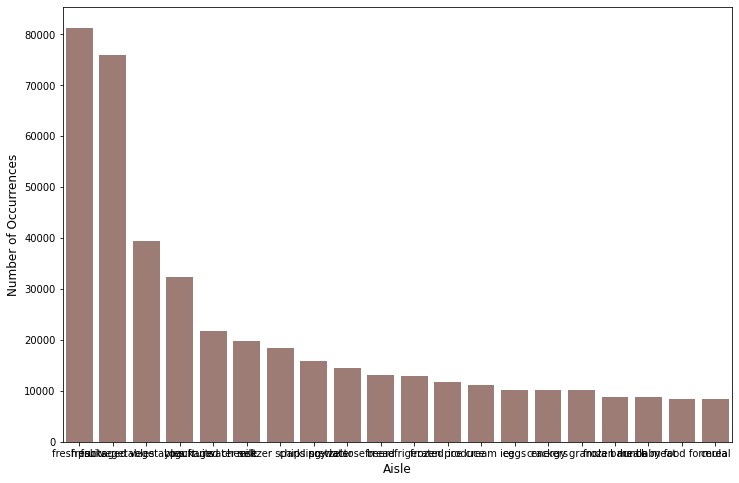

In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
#Aquí sus códigos...
plt.show()

# ¿Cuáles son los pasillos con mayor valor?

### Aquí su respuesta

Fruta y verdura

----

### Distribución departamental:

Veamos ahora la distribución inteligente del departamento.


Text(0.5, 1.0, 'Departments distribution')

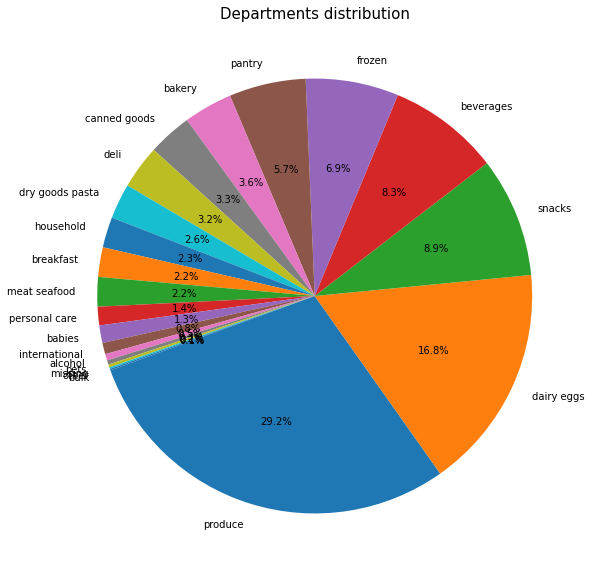

In [ ]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)

# ¿Cuál es el departamento más grande? y ¿por cuales es seguido?

### Aquí su respuesta

Produce es el departamento más grande y es seguido por Dairy eggs y snacks

---

### Relación de pedidos por departamento:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


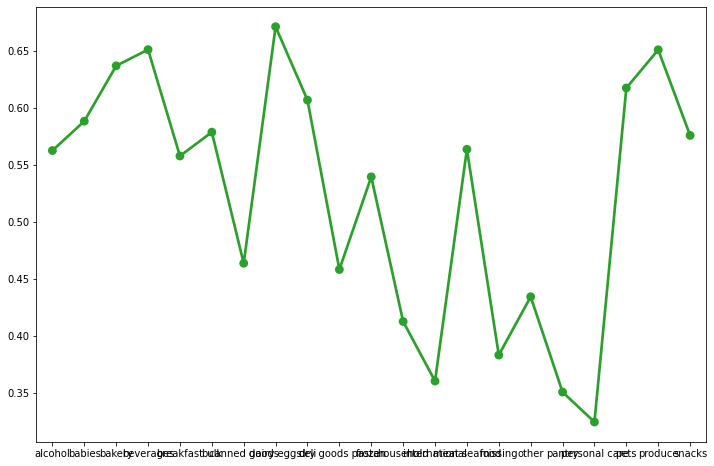

In [ ]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped_df2 = grouped_df.copy()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
#Aquí falta algo...
plt.show()

# ¿Cuáles son los departamentos con mayor y menor cantidad de proporción de pedidos?

### Aquí su respuesta

Dairy eggs tiene la mayor proporción de pedidos mientras que Personal care tiene la más baja

---


### Pasillo - Relación de pedidos:

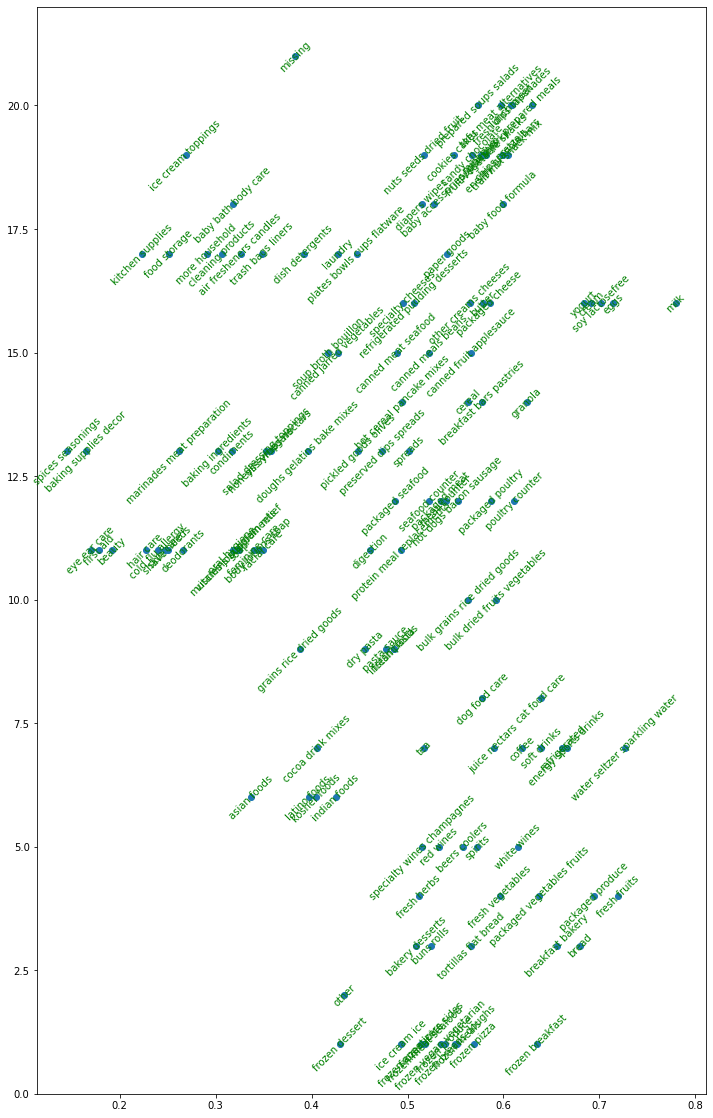

In [ ]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
#Aqui falta algo...
plt.show()

### Agregar al carrito - Relación de pedidos:

Exploremos ahora la relación entre cómo el orden de agregar el producto al carrito afecta la tasa de reorden.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


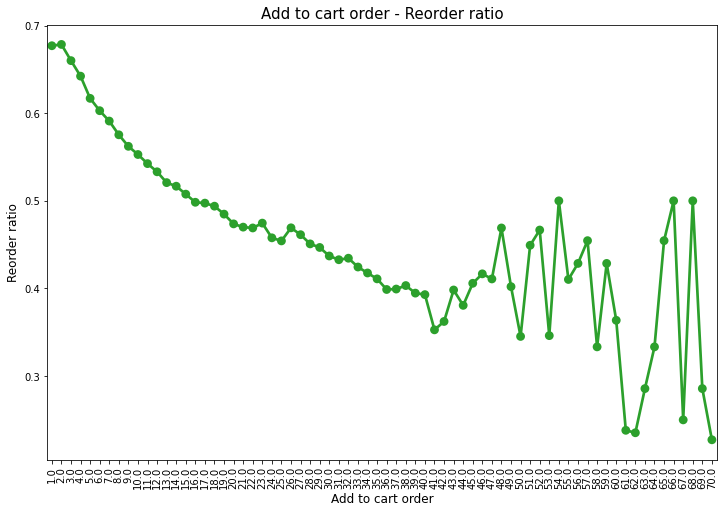

In [ ]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# ¿Qué podemos interpretar de este gráfico? ¿Hay alguna relación a la probabilidad de volver a elegir dicho producto?

### Aquí su respuesta

Sí existe relación a la probabilidad de volver a elegir el producto. Se observa que los productos que se agregan al carrito al inicio tienen más probabilidad de volver a comprarse.


---


### Reordenar la proporción por variables basadas en el tiempo:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


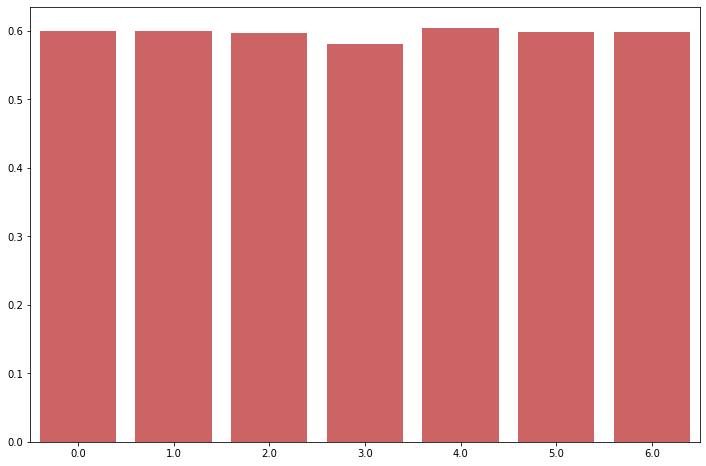

In [ ]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
#Aquí falta algo...
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Hour of day')

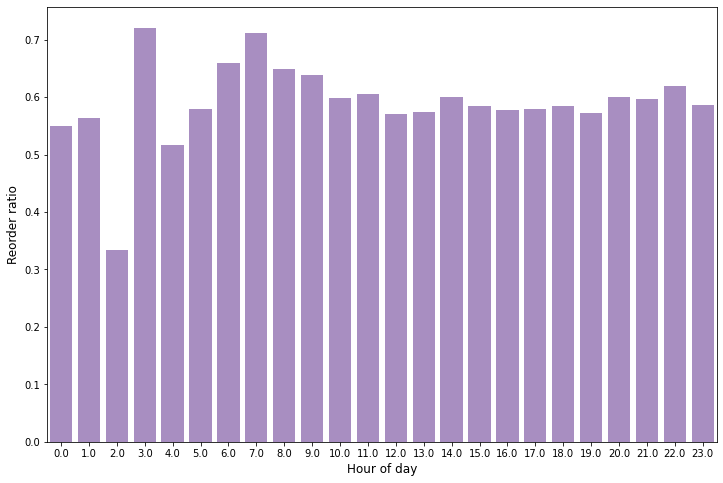

In [ ]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)

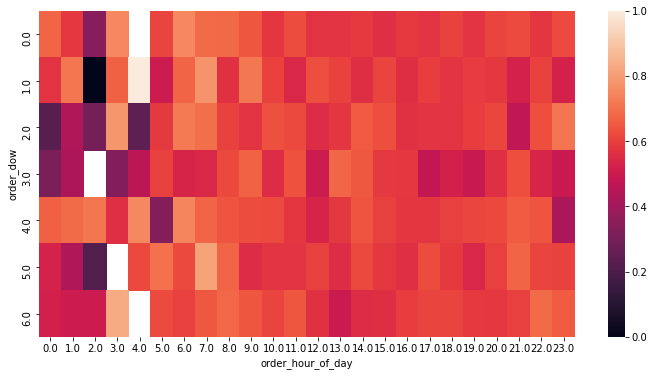

In [ ]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)


# ¿Qué podemos inferir de todo lo anterior? ¿Las tasas de reordenar algo en qué momento del día tienen mayor frecuencia?


### Aquí su respuesta

Sí, en la mañana tiene las tasas de reorden altas en comparación con el resto del día

----


In [ ]:
## A partir del siguiente árbol de asociación... 
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
test = order_products_prior_df.sample(n = 1500)  

In [ ]:
test

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
12487069,1317955,5212,22,1,Watermelon Chunks,123,4,packaged vegetables fruits,produce
13885131,1465412,5646,9,1,Organic Turkey Bacon,106,12,hot dogs bacon sausage,meat seafood
11709511,1236173,37646,2,1,Organic Gala Apples,24,4,fresh fruits,produce
26999059,2846870,3389,6,0,Diet Dr.Pepper Soda Pack,77,7,soft drinks,beverages
29397515,3100436,46526,20,0,French Green Beans,123,4,packaged vegetables fruits,produce
...,...,...,...,...,...,...,...,...,...
19799131,2088183,21137,12,1,Organic Strawberries,24,4,fresh fruits,produce
14561497,1536509,11874,6,1,"Italian Ground Turkey, Lean",49,12,packaged poultry,meat seafood
19344159,2040242,30489,1,1,Original Hummus,67,20,fresh dips tapenades,deli
11216095,1184162,7398,5,1,Indian Samosa Wrap,38,1,frozen meals,frozen


In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 287kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px 
    
fig = px.treemap(test, path=['department', 'product_name'], values='add_to_cart_order') 
  
fig.show()

¿Cuántos productos únicos se ofrecen en cada departamento / pasillo?

El tamaño de las cajas muestra la cantidad de productos en cada categoría.

### Da una breve explicación de los primeros 3 recuadros

Los recuadros externos (produce, dairy eggs, snacks) indican qué áreas cuentan con más productos vendidos; dentro de cada área vemos los productos más vendidos (banana en produce 120 compras, cage free eggs en dairy eggs 55 compras, almonds and sea salt in dark chocolate en snacks en 45 compras)